# ABC Company Employees Exploratory Data Analysis

Here,analysing a dataset of employees working in ABC company.

The objective is 
- to obtain insights on characteristics of employees in each team,their workforce pattern etc.
- Find the positions,salary and age groups of employees
- Find if there is any correlation between age and salary.


In [4]:
#importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#converting to data frame
df=pd.read_csv('ABCemployeedetails.csv')

In [5]:
#preview of Dataframe
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [6]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


In [7]:
#to get statistical summaries of all columns
df.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [9]:
#to check if there are any missing values,if any its count
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [10]:
#to check if there are any duplicated values
df.duplicated().sum()

0

In [16]:
df.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [18]:
df['Position'].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [21]:
df.loc[df['Age'].idxmin()]

Name        Devin Booker
Team        Phoenix Suns
Number                 1
Position              SG
Age                   19
Height            06-Jun
Weight               206
College         Kentucky
Salary         2127840.0
Name: 122, dtype: object

In [22]:
df.loc[df['Age'].idxmax()]

Name               Tim Duncan
Team        San Antonio Spurs
Number                     21
Position                    C
Age                        40
Height                 06-Nov
Weight                    250
College           Wake Forest
Salary              5250000.0
Name: 298, dtype: object

In [28]:
df['College'].value_counts().head()

College
Kentucky          22
Duke              20
Kansas            19
North Carolina    16
UCLA              15
Name: count, dtype: int64

In [25]:
df.loc[df['Salary'].idxmax()]

Name               Kobe Bryant
Team        Los Angeles Lakers
Number                      24
Position                    SF
Age                         37
Height                  06-Jun
Weight                     212
College                    NaN
Salary              25000000.0
Name: 109, dtype: object

In [26]:
df.loc[df['Salary'].idxmin()]

Name        Thanasis Antetokounmpo
Team               New York Knicks
Number                          43
Position                        SF
Age                             23
Height                      06-Jul
Weight                         205
College                        NaN
Salary                     30888.0
Name: 32, dtype: object

In [29]:
#changing the data of the height column with any random numbers between 150 and 180.
df['Height']=np.random.randint(150,180,size=458)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,150,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,152,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,161,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,156,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,151,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,165,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,155,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,168,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,179,231,Kansas,947276.0


Data Story: The given employee dataset contains 458 employee's details such as their Name,Team name,Number,Position,Age,Height,Weight,College Studied and Salary.
There are 30 different teams in the company in which 'New Orleans Pelicans ' team has the highest no:of Employees with 19 employees and also 5 different positions such as PG , SF, SG ,PF , C exist.The position SG(102) has the highest no:of employees,followed by PF (100),then PG(92),SF(85) and C (79).
The employees age range is between 19 and 40.The youngest employee is Devin Booker(SF) from the Team 'Phoenix Sun' with salary 2127840.0.He studied in Kentucky College. The eldest employee is  Tim Duncan(C) from the team 'San Antonio Spur' with salary 5250000.He is from Wake Forest College.
The most of the employees in this company are  from the colleges Kentucky(22),Duke(20),Kansas(19),North Carolina(16),UCLA(15).
The highest salary amount 2.5cr is earned by Kobe Bryant,(SF) in the team 'Los Angeles Lakers' with age 37 and lowest amount of 30888 is earned by Thanasis Antetokounmpo,(SF) in the team ' New York Knick' with age 23.College name of both of them are not given in the dataset.
The college details of 84 employees and salary of 11 employees are missing in the dataset.The height values in the dataset are given incorrect,so updated with the random values.

## 1.How many are there in each Team and the percentage splitting with respect to the total employees.

In [56]:
t=df['Team'].value_counts()
t

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [54]:
team_count=pd.DataFrame({'Team':t.index,'Count':t.values})

In [55]:
total=df['Name'].value_counts().sum()
team_count['Percentage']=(team_count['Count']/total)*100
team_count

,Team,Count,Percentage
0,New Orleans Pelicans,19,4.148472
1,Memphis Grizzlies,18,3.930131
2,Utah Jazz,16,3.493450
3,New York Knicks,16,3.493450
4,Milwaukee Bucks,16,3.493450
5,Brooklyn Nets,15,3.275109
6,Portland Trail Blazers,15,3.275109
7,Oklahoma City Thunder,15,3.275109
8,Denver Nuggets,15,3.275109
9,Washington Wizards,15,3.275109


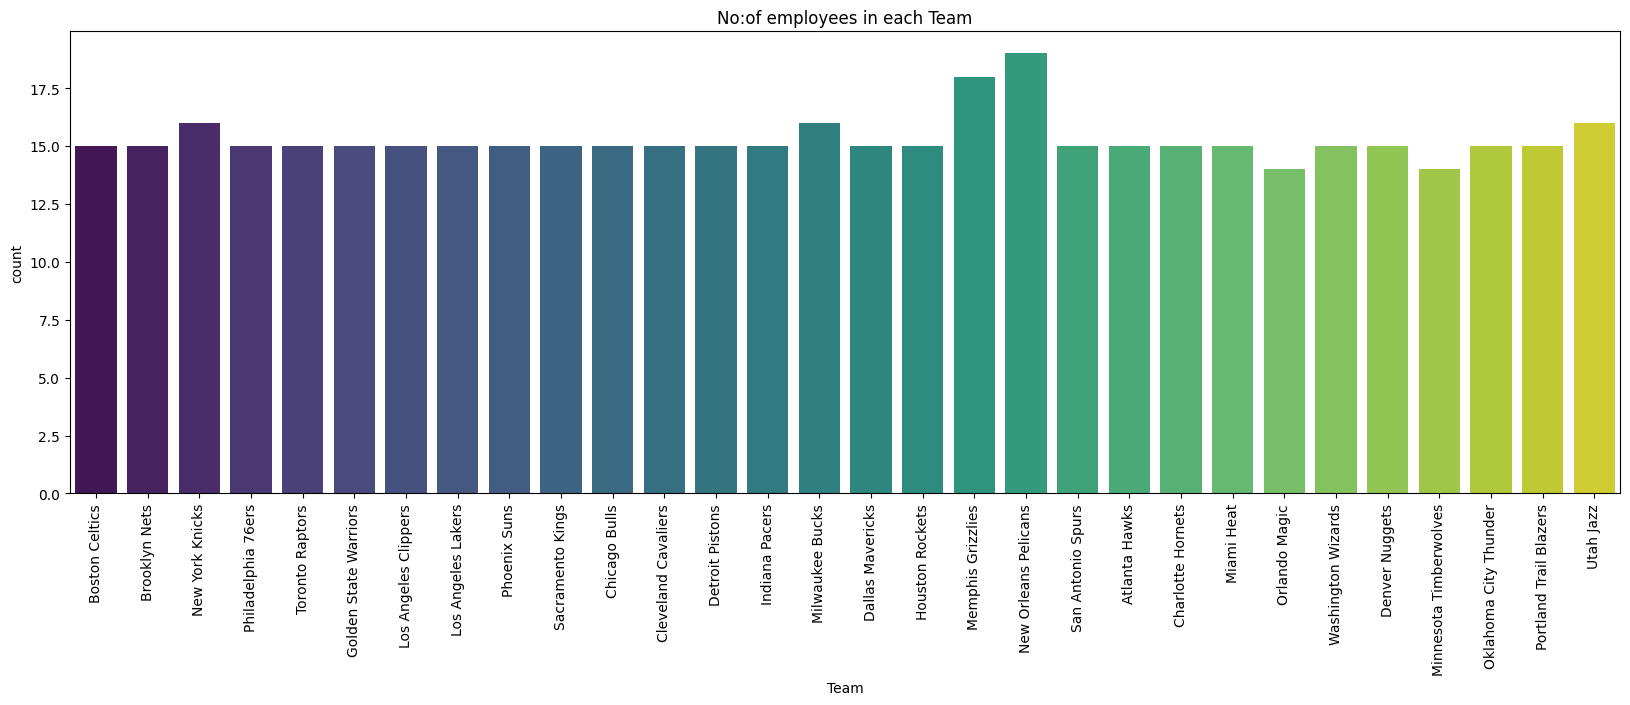

In [51]:
plt.figure(figsize= (20,6))
plt.xticks(rotation='vertical')
sns.countplot(x='Team',data= df,hue='Team',palette='viridis')
plt.title('No:of employees in each Team')
plt.show()

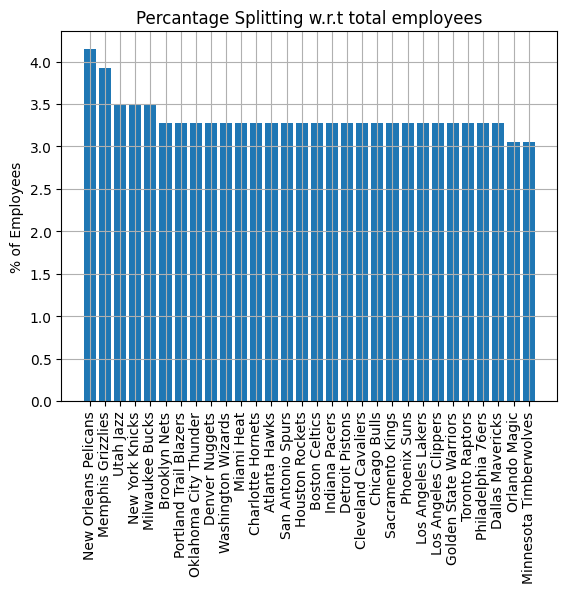

In [57]:
plt.xticks(rotation=90)
plt.bar(team_count['Team'] ,team_count['Percentage'])
plt.title('Percantage Splitting w.r.t total employees')
plt.ylabel('% of Employees')
plt.grid(True)


Data story:From the countplot analysis ,it is shown that New Orleans Pelicans have highest number of employees ie 19,followed by Memphis Grizzlies with 18 .Three teams have count 16 and two teams have 14 individuals.All other teams have count 15. Most of the teams have 15 no:of employees 

## 2.Segregate the employees w.r.t different positions.

In [59]:
df['Position'].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

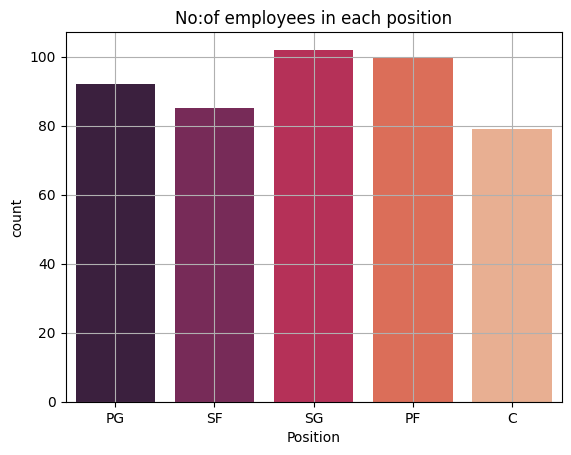

In [62]:
sns.countplot(x='Position',data= df,hue='Position',palette='rocket')
plt.title('No:of employees in each position')
plt.grid(True)
plt.show()

Data story:The above count plot shows that the no:of employees(102) holding SG position is the highest ,followed by PF(100).No:of employees(79) hoding C position is the least  

### Grouping the Employees by position

In [66]:
df_group=df.groupby('Position')
for name,contents in df_group:
    print(f" Position: {name}")
    print(contents['Name'])
    print("\n")

 Position: C
7         Kelly Olynyk
10     Jared Sullinger
14        Tyler Zeller
23         Brook Lopez
27          Henry Sims
            ...       
439      Mason Plumlee
447        Rudy Gobert
455       Tibor Pleiss
456        Jeff Withey
457           Priyanka
Name: Name, Length: 79, dtype: object


 Position: PF
4         Jonas Jerebko
5          Amir Johnson
6         Jordan Mickey
24     Chris McCullough
25          Willie Reed
             ...       
435      Meyers Leonard
441         Noah Vonleh
442       Trevor Booker
446      Derrick Favors
452          Trey Lyles
Name: Name, Length: 100, dtype: object


 Position: PG
0      Avery Bradley
8       Terry Rozier
9       Marcus Smart
11     Isaiah Thomas
19      Jarrett Jack
           ...      
440    Brian Roberts
443       Trey Burke
445       Dante Exum
453     Shelvin Mack
454        Raul Neto
Name: Name, Length: 92, dtype: object


 Position: SF
1                 Jae Crowder
32     Thanasis Antetokounmpo
33            Ca

### 3.Find from which age group most of the employees belong to.

In [67]:
df['Age'].value_counts()

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

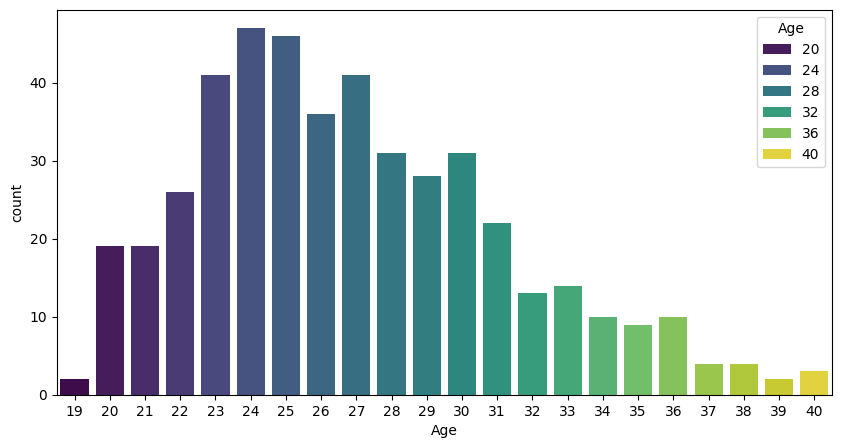

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=df,hue='Age',palette='viridis')
plt.show()

In [53]:
bins = [18,20,25,30,35,40]
labels = ['18-20','21-25','26-30','31-35','36-40']
df['AgeRange'] = pd.cut(df['Age'],bins=bins,labels=labels)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,AgeRange
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0,21-25
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0,21-25
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN,26-30
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0,21-25
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0,26-30
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0,26-30
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0,21-25
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0,26-30
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0,26-30


In [71]:
df['AgeRange'].value_counts()

AgeRange
21-25    179
26-30    167
31-35     68
36-40     23
18-20     21
Name: count, dtype: int64

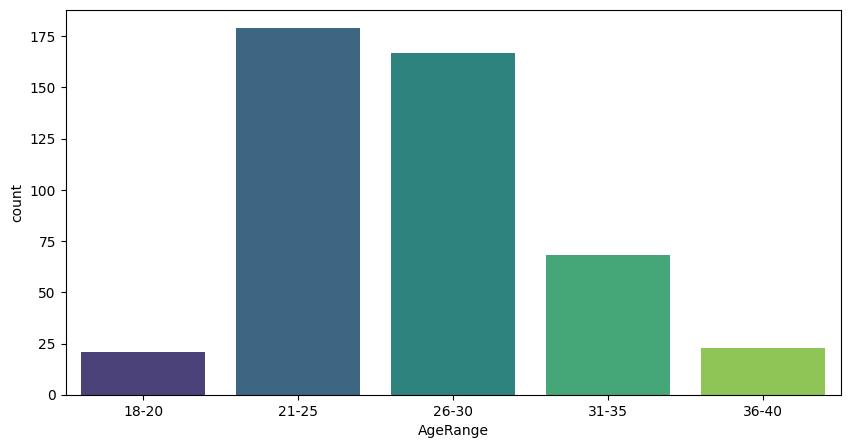

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x='AgeRange',data=df,hue='AgeRange',palette='viridis')
plt.show()

Data story:From the above analysis,its understood that if the employees are categorised according to their age then most of the employees belongs to the  age group 21-25 

## 4.Find out under which team and position, spending in terms of salary is high.

In [8]:
spending_details = df.groupby(['Team','Position'])['Salary'].sum()
spending_details

Team                Position
Atlanta Hawks       C           22756250.0
                    PF          23952268.0
                    PG           9763400.0
                    SF           6000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C           24490429.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 149, dtype: float64

In [9]:
max_spending_team_position = spending_details.idxmax()
max_spending_team_position

('Los Angeles Lakers', 'SF')

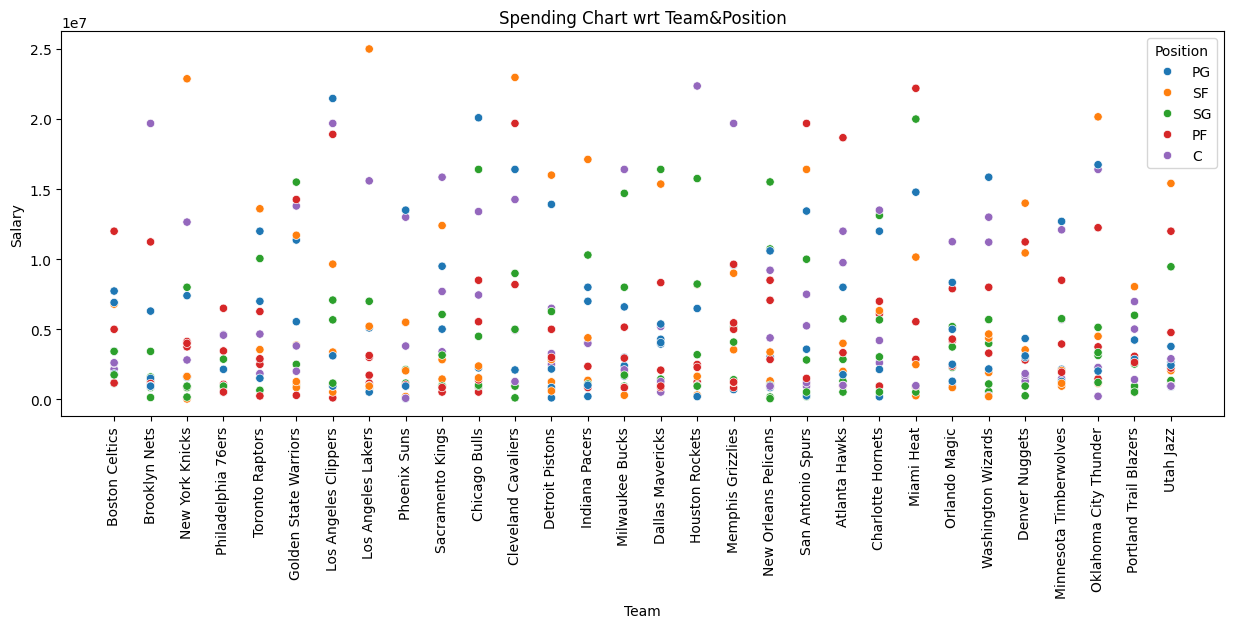

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(y="Salary", x="Team", hue="Position", data=df)
plt.ylabel("Salary")
plt.xlabel("Team")
plt.title("Spending Chart wrt Team&Position")
plt.xticks(rotation='vertical')
plt.show()

In [27]:
avg_spending = df.groupby(['Team','Position'])['Salary'].mean().reset_index()
avg_spending

,Team,Position,Salary
0,Atlanta Hawks,C,7.585417e+06
1,Atlanta Hawks,PF,5.988067e+06
2,Atlanta Hawks,PG,4.881700e+06
3,Atlanta Hawks,SF,3.000000e+06
4,Atlanta Hawks,SG,2.607758e+06
...,...,...,...
144,Washington Wizards,C,8.163476e+06
145,Washington Wizards,PF,5.650000e+06
146,Washington Wizards,PG,9.011208e+06
147,Washington Wizards,SF,2.789700e+06


In [13]:
max_spending_team_position = avg_spending.idxmax()
max_spending_team_position

('Memphis Grizzlies', 'C')

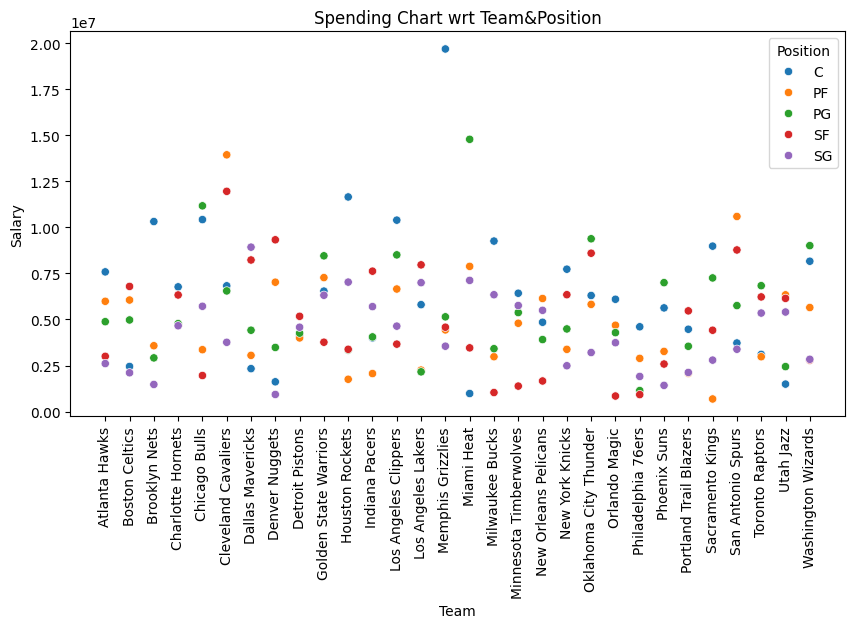

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(y="Salary", x="Team", hue="Position", data=avg_spending)
plt.ylabel("Salary")
plt.xlabel("Team")
plt.title("Spending Chart wrt Team&Position")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
Data Story:

From the above analysis, we found that Team LA Lakers has highest spending for a position i.e. (SF)
However, Team Memphis Grizzlies has highest average spending for a position i.e. (C)  

## Find if there is any correlation between age and salary , represent it visually

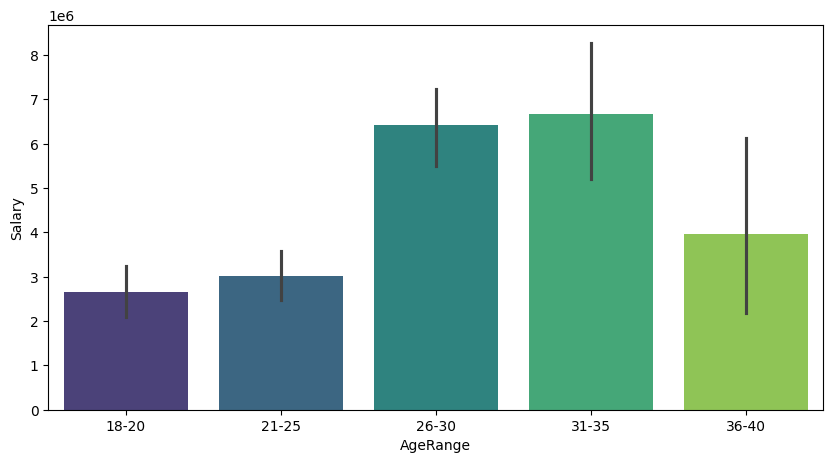

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x='AgeRange',y='Salary',data=df,hue='AgeRange',palette='viridis')
plt.show()

             Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


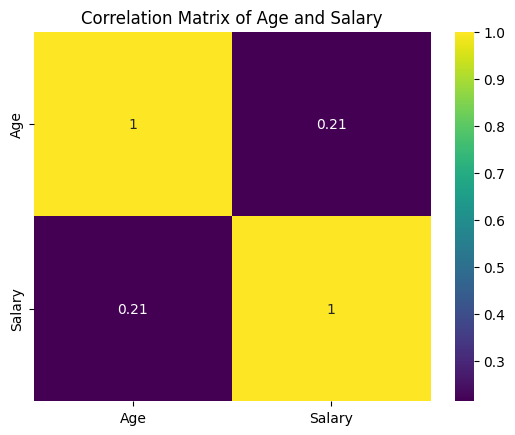

In [32]:

corr = df[['Age','Salary']].corr()
print(corr)
# Create heatmap
sns.heatmap(corr, annot=True, cmap="viridis")
# Add title
plt.title("Correlation Matrix of Age and Salary")
# Show plot
plt.show()

DataStory: From the barplot, it is clear that the age group 31-35 has the highest salary among employees.
The 18-20 and 36-40 age category shows lowest salary,so we cant say that the salary distribution is proportional to age.
The correlation matrix indicates that there's a positive  correlation with value .21.